<a href="https://colab.research.google.com/github/widyadaridhyp/Unlocking-Online-Shopper-Behavior/blob/develop/FINAL_PROJECT_SEABORN_TEAM_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/widyadaridhyp/Unlocking-Online-Shopper-Behavior/main/dataset.csv')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


# New Section

In [ ]:
# Rename columns with lowercase
def rename_column(col):
  return col.lower()

new_cols = [rename_column(col) for col in df.columns]

# Apply the new column names
df.columns = new_cols

In [ ]:
#change the column for two word separated with '_'(underscore)
df = df.rename(columns={'productrelated': 'product_related',
                        'productrelated_duration':'product_related_duration',
                        'productrelated_duration':'product_related_duration',
                        'bouncerates':'bounce_rates',
                        'exitrates':'exit_rates',
                        'pagevalue':'page_value',
                        'specialday':'special_day',
                        'operatingsystems': 'operating_systems',
                        'traffictype': 'traffic_type',
                        'visitortype': 'visitor_type'})

In [ ]:
df.head(3)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,pagevalues,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False


In [ ]:
#change weekend into 1 and 0
df['weekend'] = df['weekend'].replace({True: 1, False: 0})

In [ ]:
#change column revenue into 1 and 0
df['revenue'] = df['revenue'].replace({True:1, False:0})

- Handle missing values
- Handle duplicated data
- Handle outliers - Bintang
- Feature transformation - Bintang
- Feature encoding - Widya
- Handle class imbalance - Wafi
- Feature Engineering -Fajar

# New Section

# **Missing Values**

In [ ]:
#cek missing value
df.isnull().any()

administrative               True
administrative_duration      True
informational               False
informational_duration      False
product_related             False
product_related_duration     True
bounce_rates                 True
exit_rates                  False
pagevalues                  False
special_day                 False
month                       False
operating_systems            True
browser                     False
region                      False
traffic_type                False
visitor_type                False
weekend                     False
revenue                     False
dtype: bool

**There is a missing value on column:**
- administrative
- administrative_duration
- product_related_duration
- bounce_rates
- operating_systems

In [ ]:
# change Null on administrative where the administrative_duration is Null
df.loc[(df['administrative'].isnull()) & (df['administrative_duration'].isnull()), ['administrative', 'administrative_duration']]=0

# change Null value on administrative_duration where administrative is 0
df.loc[(df['administrative'] == 0) & (df['administrative_duration'].isnull()), 'administrative_duration'] = 0

#change Null value on administrative where administrative_duraiton is 0
df.loc[(df['administrative'].isnull()) & (df['administrative_duration'] == 0), 'administrative'] = 0

In [ ]:
# for Null value on administration where the administrative_duration has a value > 0
# will be use an asumption where the visiting administrative page is 2 minutes or 120 second
# Hence the Null value on administrative will be filled with the formula of administrative_duration/60

df.loc[(df['administrative'].isnull()) & (df['administrative_duration']>0),'administrative'] = df['administrative_duration'] / 120

In [ ]:
# to fill Null value on administrative_duration where administrative > 0
# will be used the same method as above
df.loc[(df['administrative_duration'].isnull()) & (df['administrative']>0),'administrative_duration'] = df['administrative'] * 120

In [ ]:
df.loc[(df['product_related'] > 0) & (df['product_related_duration'].isnull()),'product_related_duration'] = df['product_related'] * 120

In [ ]:
df.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,pagevalues,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,1,0


In [ ]:
# fill Null value on product_related_duration where product_related is 0
df.loc[(df['product_related']==0) & (df['product_related_duration'].isnull()),'product_related_duration'] = 0

In [ ]:
#drop the Null value from bounce_rate
df_cleaned = df.dropna(subset=['bounce_rates'])


In [ ]:
df_cleaned['operating_systems'].fillna(df['operating_systems'].mode()[0], inplace=True)

<ipython-input-158-38d3fd050ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['operating_systems'].fillna(df['operating_systems'].mode()[0], inplace=True)


In [ ]:
df_cleaned.isnull().any()

administrative              False
administrative_duration     False
informational               False
informational_duration      False
product_related             False
product_related_duration    False
bounce_rates                False
exit_rates                  False
pagevalues                  False
special_day                 False
month                       False
operating_systems           False
browser                     False
region                      False
traffic_type                False
visitor_type                False
weekend                     False
revenue                     False
dtype: bool

# Duplicated

In [ ]:
#drop the duplicates
df_cleaned= df_cleaned.drop_duplicates()

In [ ]:
df_cleaned.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12148, dtype: bool

# Handle outliers

In [ ]:

def check_outliers(df_cleaned):
    outliers = pd.DataFrame(columns=df_cleaned.columns)

    for col in df_cleaned.select_dtypes(include=[np.number]):
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)

    return df_cleaned.assign(**outliers)

df_with_outliers = check_outliers(df.copy())
print(df_with_outliers.any())

administrative               True
administrative_duration      True
informational                True
informational_duration       True
product_related              True
product_related_duration     True
bounce_rates                 True
exit_rates                   True
pagevalues                   True
special_day                  True
month                       False
operating_systems            True
browser                      True
region                       True
traffic_type                 True
visitor_type                False
weekend                      True
revenue                      True
dtype: bool


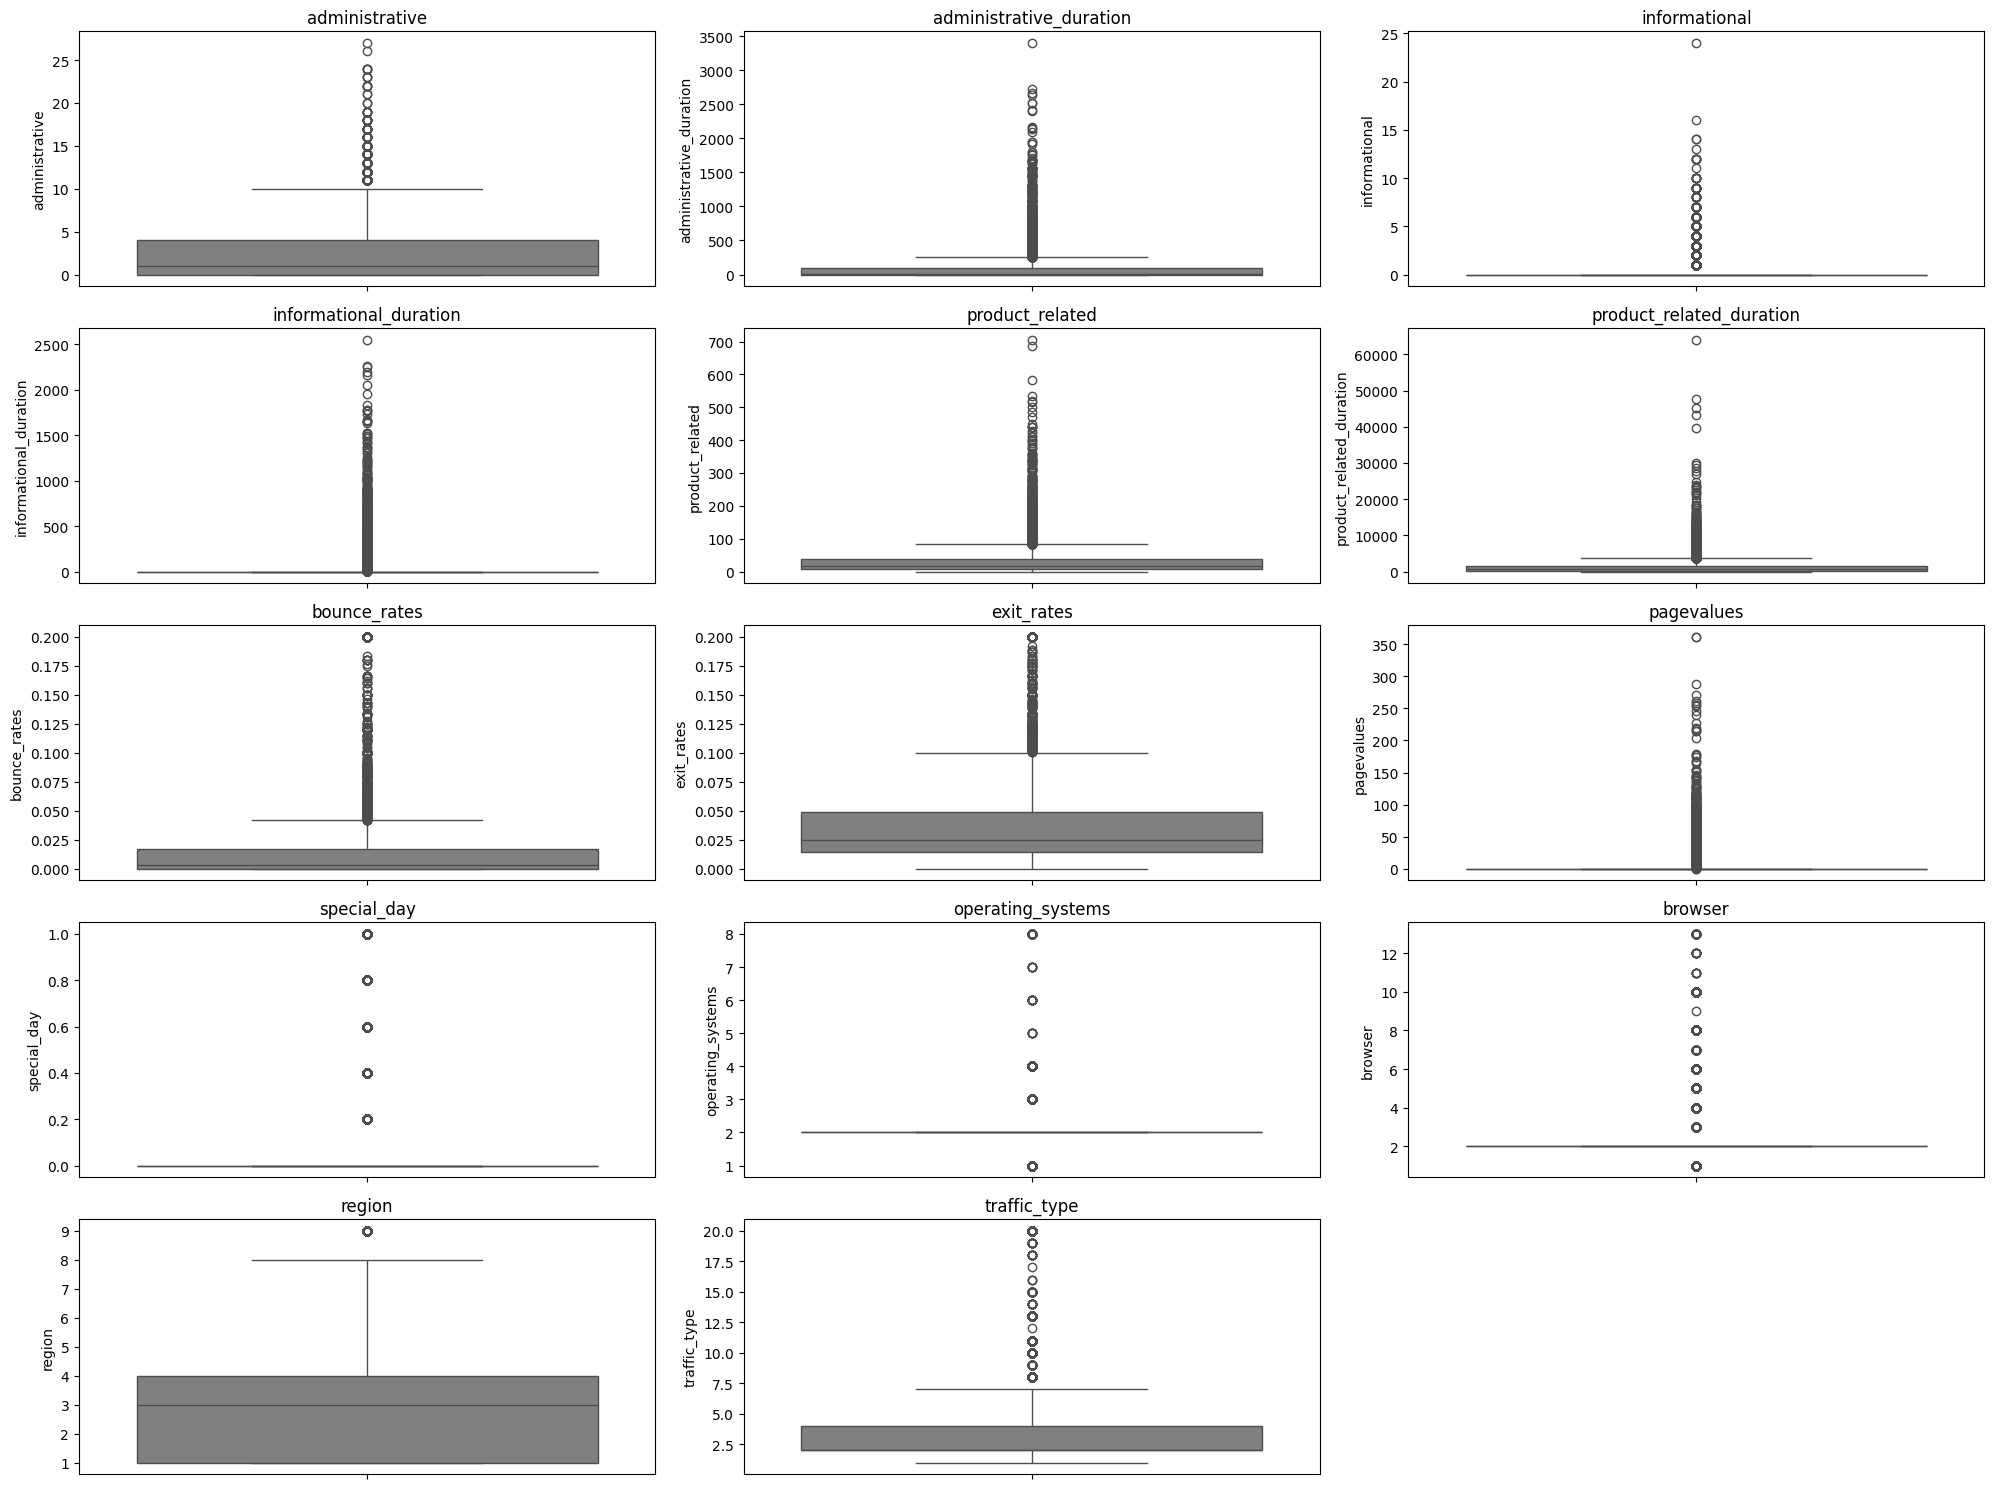

In [ ]:
category = ['month', 'visitor_type', 'weekend', 'revenue']
nums = ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'product_related',
        'product_related_duration', 'bounce_rates', 'exit_rates', 'pagevalues', 'special_day', 'operating_systems',
        'browser', 'region', 'traffic_type']

# Menentukan ukuran figure secara keseluruhan
plt.figure(figsize=(20, 15))

for i in range(len(nums)):
    plt.subplot(len(nums) // 3 + 1, 3, i + 1)  # Mengatur subplot menjadi beberapa baris
    sns.boxplot(y=df_cleaned[nums[i]], color='gray', orient='v')
    plt.title(nums[i])  # Menambahkan judul pada setiap subplot

plt.tight_layout()
plt.show()

In [ ]:
#menghapus outliers menggunakan IQR pada data kolom yang signifikan
#outliers of administrative_duration column
Q1_administrative_duration = df_cleaned['administrative_duration'].quantile(0.25)
Q3_administrative_duration = df_cleaned['administrative_duration'].quantile(0.75)
IQR_administrative_duration = Q3_administrative_duration - Q1_administrative_duration
lower_bound_ad = Q1_administrative_duration - 1.5 * IQR_administrative_duration
upper_bound_ad = Q3_administrative_duration + 1.5 * IQR_administrative_duration

#outliers of informational_duration column
Q1_informational_duration = df_cleaned['informational_duration'].quantile(0.25)
Q3_informational_duration = df_cleaned['informational_duration'].quantile(0.75)
IQR_informational_duration = Q3_informational_duration - Q1_informational_duration
lower_bound_id = Q1_informational_duration - 1.5 * IQR_informational_duration
upper_bound_id = Q3_informational_duration + 1.5 * IQR_informational_duration

#outliers of product_related column
Q1_product_related = df_cleaned['product_related'].quantile(0.25)
Q3_product_related = df_cleaned['product_related'].quantile(0.75)
IQR_product_related = Q3_product_related - Q1_product_related
lower_bound_pr = Q1_product_related - 1.5 * IQR_product_related
upper_bound_pr = Q3_product_related + 1.5 * IQR_product_related

#outliers of product_related_duration column
Q1_product_related_duration = df_cleaned['product_related_duration'].quantile(0.25)
Q3_product_related_duration = df_cleaned['product_related_duration'].quantile(0.75)
IQR_product_related_duration = Q3_product_related_duration - Q1_product_related_duration
lower_bound_prd = Q1_product_related_duration - 1.5 * IQR_product_related_duration
upper_bound_prd = Q3_product_related_duration + 1.5 * IQR_product_related_duration

#outliers of bounce_rates column
Q1_bounce_rates = df_cleaned['bounce_rates'].quantile(0.25)
Q3_bounce_rates = df_cleaned['bounce_rates'].quantile(0.75)
IQR_bounce_rates = Q3_bounce_rates - Q1_bounce_rates
lower_bound_br = Q1_bounce_rates - 1.5 * IQR_bounce_rates
upper_bound_br = Q3_bounce_rates + 1.5 * IQR_bounce_rates

#outliers of exit_rates column
Q1_exit_rates = df_cleaned['exit_rates'].quantile(0.25)
Q3_exit_rates = df_cleaned['exit_rates'].quantile(0.75)
IQR_exit_rates = Q3_exit_rates - Q1_exit_rates
lower_bound_er = Q1_exit_rates - 1.5 * IQR_exit_rates
upper_bound_er = Q3_exit_rates + 1.5 * IQR_exit_rates

#outliers of pagevalues column
Q1_pagevalues = df_cleaned['pagevalues'].quantile(0.25)
Q3_pagevalues = df_cleaned['pagevalues'].quantile(0.75)
IQR_pagevalues = Q3_pagevalues - Q1_pagevalues
lower_bound_pv = Q1_pagevalues - 1.5 * IQR_pagevalues
upper_bound_pv = Q3_pagevalues + 1.5 * IQR_pagevalues

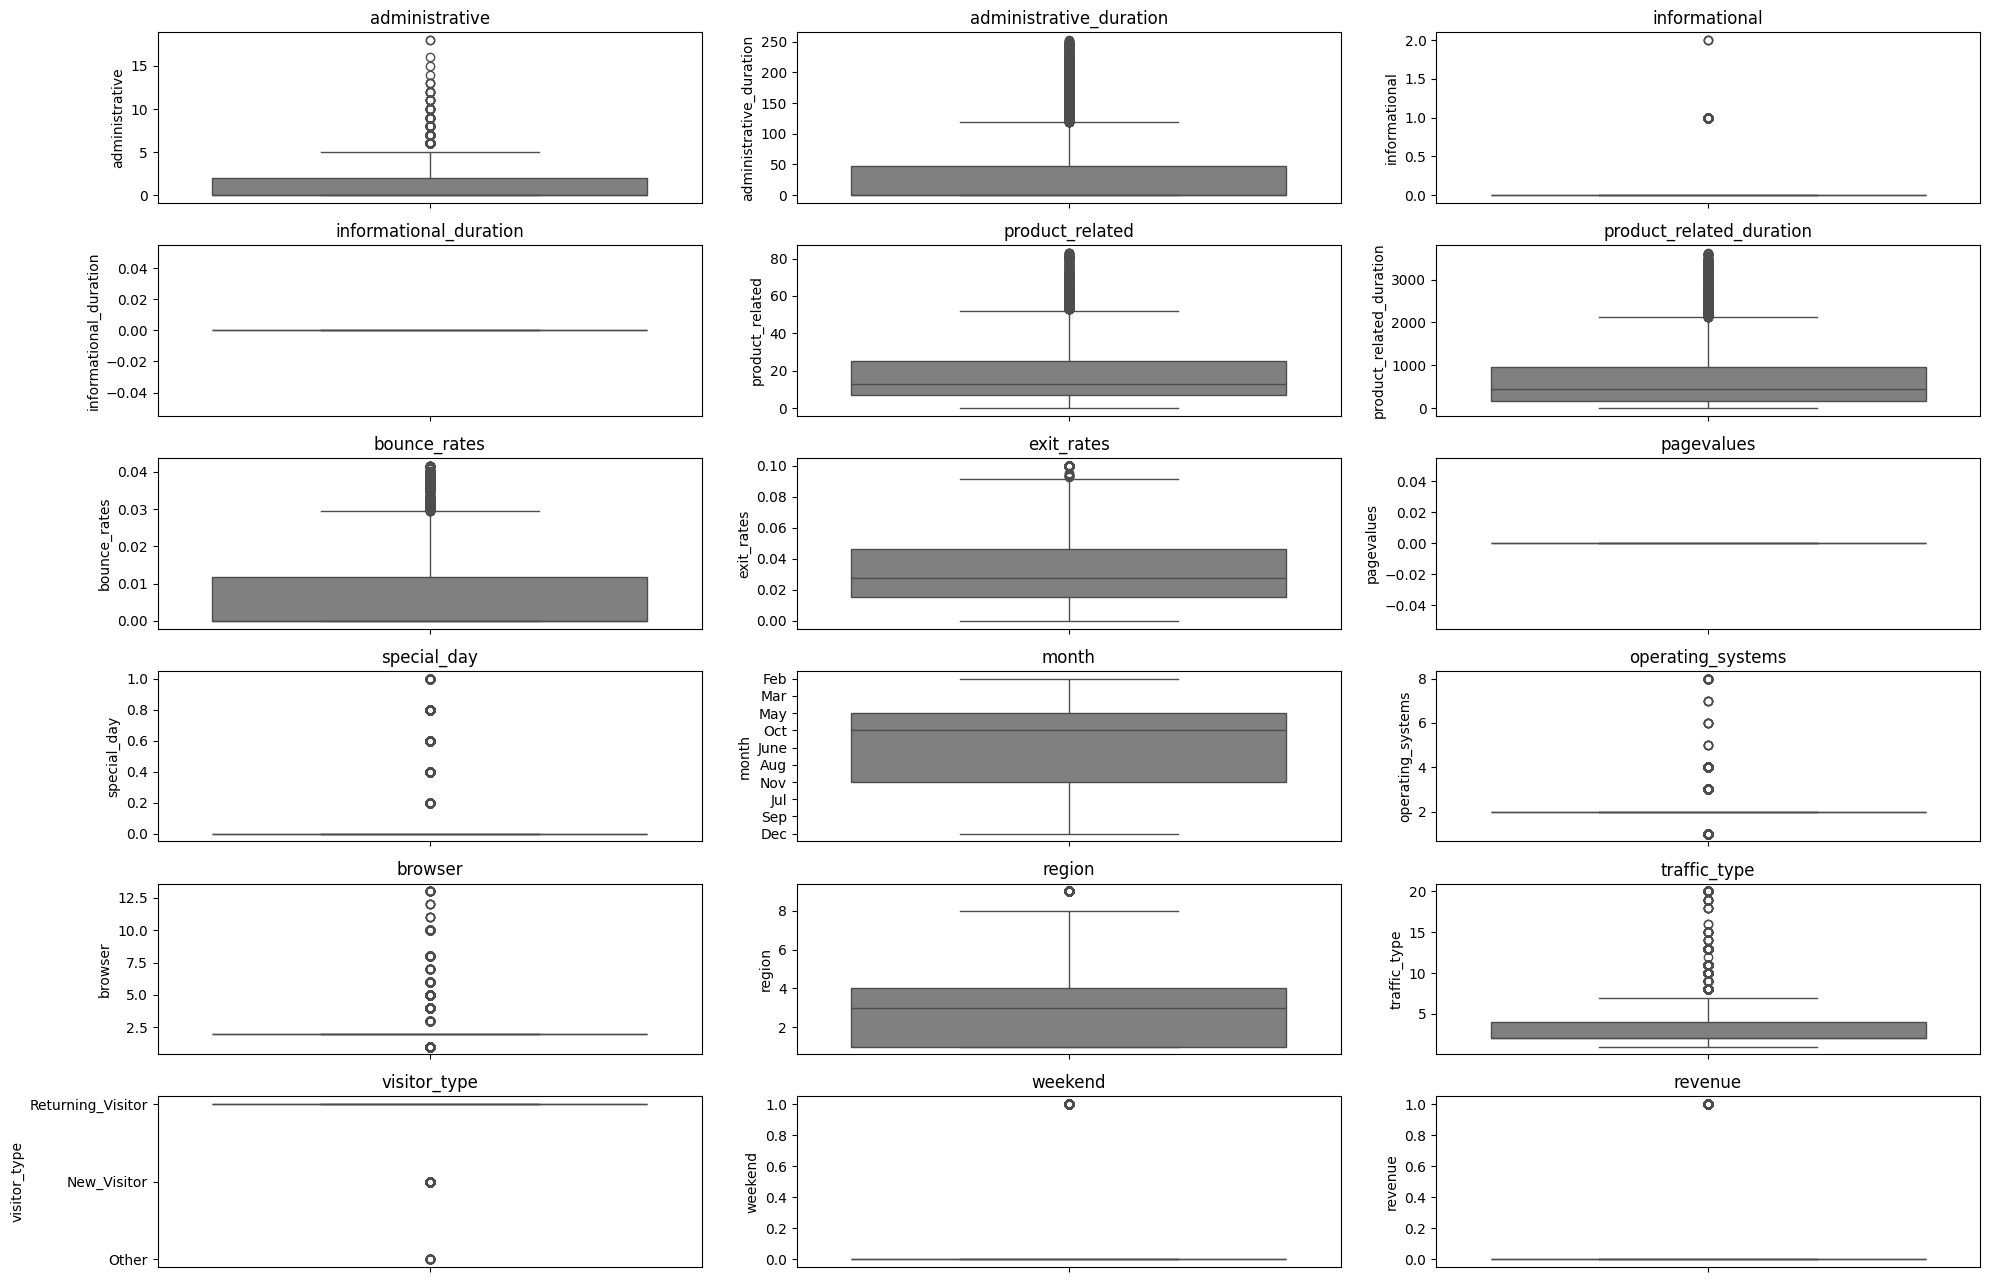

In [ ]:
# Hapus outliers menggunakan batas bawah dan atas yang telah dihitung
df_cleaned_filtered = df_cleaned[
    (df_cleaned['administrative_duration'] >= lower_bound_ad) & (df_cleaned['administrative_duration'] <= upper_bound_ad) &
    (df_cleaned['informational_duration'] >= lower_bound_id) & (df_cleaned['informational_duration'] <= upper_bound_id) &
    (df_cleaned['product_related'] >= lower_bound_pr) & (df_cleaned['product_related'] <= upper_bound_pr) &
    (df_cleaned['product_related_duration'] >= lower_bound_prd) & (df_cleaned['product_related_duration'] <= upper_bound_prd) &
    (df_cleaned['bounce_rates'] >= lower_bound_br) & (df_cleaned['bounce_rates'] <= upper_bound_br) &
    (df_cleaned['exit_rates'] >= lower_bound_er) & (df_cleaned['exit_rates'] <= upper_bound_er) &
    (df_cleaned['pagevalues'] >= lower_bound_pv) & (df_cleaned['pagevalues'] <= upper_bound_pv)
]

# Visualisasi data setelah penghapusan outliers
plt.figure(figsize=(20, 15))

# Loop untuk menggambar boxplot masing-masing kolom
nums2 = df_cleaned.columns.tolist()
for i in range(len(nums2)):
    plt.subplot(len(nums2) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df_cleaned_filtered[nums2[i]], color='gray', orient='v')
    plt.title(nums2[i])

plt.tight_layout()
plt.show()

# Feature transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
data = df_cleaned.copy()

In [ ]:
#normalisasi
data['administrative_norm'] = MinMaxScaler().fit_transform(df_cleaned['administrative'].values.reshape(len(df_cleaned),1))
data['administrative_duration_norm'] = MinMaxScaler().fit_transform(df_cleaned['administrative_duration'].values.reshape(len(df_cleaned),1))
data['informational_norm'] = MinMaxScaler().fit_transform(df_cleaned['informational'].values.reshape(len(df_cleaned),1))
data['informational_duration_norm'] = MinMaxScaler().fit_transform(df_cleaned['informational_duration'].values.reshape(len(df_cleaned),1))
data['product_related_norm'] = MinMaxScaler().fit_transform(df_cleaned['product_related'].values.reshape(len(df_cleaned),1))
data['product_related_duration_norm'] = MinMaxScaler().fit_transform(df_cleaned['product_related_duration'].values.reshape(len(df_cleaned),1))
data['bounce_rates_norm'] = MinMaxScaler().fit_transform(df_cleaned['bounce_rates'].values.reshape(len(df_cleaned),1))
data['exit_rates_norm'] = MinMaxScaler().fit_transform(df_cleaned['exit_rates'].values.reshape(len(df_cleaned),1))
data['pagevalues_norm'] = MinMaxScaler().fit_transform(df_cleaned['pagevalues'].values.reshape(len(df_cleaned),1))
data['special_day_norm'] = MinMaxScaler().fit_transform(df_cleaned['special_day'].values.reshape(len(df_cleaned),1))
data['operating_systems_norm'] = MinMaxScaler().fit_transform(df_cleaned['operating_systems'].values.reshape(len(df_cleaned),1))
data['browser_norm'] = MinMaxScaler().fit_transform(df_cleaned['browser'].values.reshape(len(df_cleaned),1))
data['region_norm'] = MinMaxScaler().fit_transform(df_cleaned['region'].values.reshape(len(df_cleaned),1))
data['traffic_type'] = MinMaxScaler().fit_transform(df_cleaned['traffic_type'].values.reshape(len(df_cleaned),1))

In [ ]:
data

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,pagevalues,special_day,...,informational_duration_norm,product_related_norm,product_related_duration_norm,bounce_rates_norm,exit_rates_norm,pagevalues_norm,special_day_norm,operating_systems_norm,browser_norm,region_norm
0,0.0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000
1,0.0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.142857,0.083333,0.000
2,0.0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.428571,0.000000,1.000
3,0.0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0.285714,0.083333,0.125
4,0.0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0.285714,0.166667,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,0.428571,0.416667,0.000
12326,0.0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,0.285714,0.083333,0.000
12327,0.0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,0.285714,0.083333,0.000
12328,4.0,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,0.142857,0.083333,0.250


*italicized text*# New Section

# Feature encoding

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12148 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12148 non-null  float64
 1   administrative_duration   12148 non-null  float64
 2   informational             12148 non-null  int64  
 3   informational_duration    12148 non-null  float64
 4   product_related           12148 non-null  int64  
 5   product_related_duration  12148 non-null  float64
 6   bounce_rates              12148 non-null  float64
 7   exit_rates                12148 non-null  float64
 8   pagevalues                12148 non-null  float64
 9   special_day               12148 non-null  float64
 10  month                     12148 non-null  object 
 11  operating_systems         12148 non-null  float64
 12  browser                   12148 non-null  int64  
 13  region                    12148 non-null  int64  
 14  traffic_typ

## Feature Encoding pada 'month'

In [ ]:
df_cleaned.month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
# Define a mapping from month abbreviations to integer values
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12,}

In [ ]:
df_cleaned['month_encode'] = df_cleaned['month'].map(month_mapping)

In [ ]:
df_cleaned['month_encode'].fillna(df_cleaned['month_encode'].mode()[0], inplace=True)

## Feature Encoding pada'visitor_type'

In [ ]:
df_cleaned.visitor_type.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
visitor_mapping = {
    'Returning_Visitor': 0,
    'New_Visitor': 1,
    'Other': 2
}

# Apply the mapping to the DataFrame
df_cleaned['visitor_type_encoded'] = df_cleaned['visitor_type'].map(visitor_mapping)

# Handle class imbalance

In [ ]:
data = df_cleaned.drop(columns=(['month','visitor_type']))
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12148 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12148 non-null  float64
 1   administrative_duration   12148 non-null  float64
 2   informational             12148 non-null  int64  
 3   informational_duration    12148 non-null  float64
 4   product_related           12148 non-null  int64  
 5   product_related_duration  12148 non-null  float64
 6   bounce_rates              12148 non-null  float64
 7   exit_rates                12148 non-null  float64
 8   pagevalues                12148 non-null  float64
 9   special_day               12148 non-null  float64
 10  operating_systems         12148 non-null  float64
 11  browser                   12148 non-null  int64  
 12  region                    12148 non-null  int64  
 13  traffic_type              12148 non-null  int64  
 14  weekend    

In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop('revenue', axis=1)
y = data['revenue']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled.shape

(20502, 17)

In [ ]:
y_resampled.value_counts()

revenue
0    10251
1    10251
Name: count, dtype: int64

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Pisahkan data ke dalam set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instansiasi objek SMOTE dan sampel ulang set pelatihan saja
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Modelling dengan SMOTE

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_smote, y_train_smote)

xgb.score(X_test, y_test)

0.8983539094650206

### Modelling tanpa SMOTE

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)

xgb.score(X_test, y_test)

0.9069958847736626

# Feature Engineering

In [ ]:
df_cleaned.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,pagevalues,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue,month_encode,visitor_type_encoded
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,0,0,2.0,0
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,0,0,2.0,0
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,0,0,2.0,0
3,0.0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,0,0,2.0,0
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,1,0,2.0,0


- conversion rate
-